###       **Python  For Data Analysis PROJECT**
    
   1. What are the top selling products in the superstore?
    
   2. What is the sales trend over time (monthly, r   )?

   3. Which category of products generates the highest revenue ad pr ofit?

   4. Which region generates the most  sales?

   5. What is the impact of discounts and promotions -on sales?

   6. What is the average profit margin for each produc-t category?

   7. Which sub-category of products has the hi-ghest demand?

   8. Which Year had the most a-nd least sales?

   9. Which month had the most- and least sales?

   10. Which state had the mo-st and least sales?

   11. Which states had the m-ost and least profit?

   12. Which 3 cities had th-e most and least sales?

   13. Which 3 cities h-ad most and least profit?

   14. Which region had the most and least sa-les, most and least profit?

   15. How many products are being- sold in which shipping mode?

   16. Wat is the order value for each- product category by ship mode?

   17. Which product category -has the highest and least orders?

   18. Which sub-categor-y has the highest and least orders?

   19. Which sub-category has the- highest and lowest profit and sales?

   20. How ma-ny customers are there in each segment?

   21. Which segment had the most and least profit and sales?.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

####
- **What are the top selling products in the superstore?**



In [6]:
SuperStore = pd.read_excel('Sample - Superstore.xlsx')

SuperStore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-08-11 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-08-11 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-12-06 00:00:00,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-11-10 00:00:00,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-11-10 00:00:00,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [10]:
Top_sellingProducts = SuperStore.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)

print(Top_sellingProducts.head(10))

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


In [12]:
#For Quantity sold
Top_sellingProducts = SuperStore.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False)

print(Top_sellingProducts.head(10))

Product Name
Staples                                                       215
Staple envelope                                               170
Easy-staple paper                                             150
Staples in misc. colors                                        86
KI Adjustable-Height Table                                     74
Avery Non-Stick Binders                                        71
Storex Dura Pro Binders                                        71
GBC Premium Transparent Covers with Diagonal Lined Pattern     67
Situations Contoured Folding Chairs, 4/Set                     64
Staple-based wall hangings                                     62
Name: Quantity, dtype: int64


- **What is the sales trend over time (monthly, year)?**

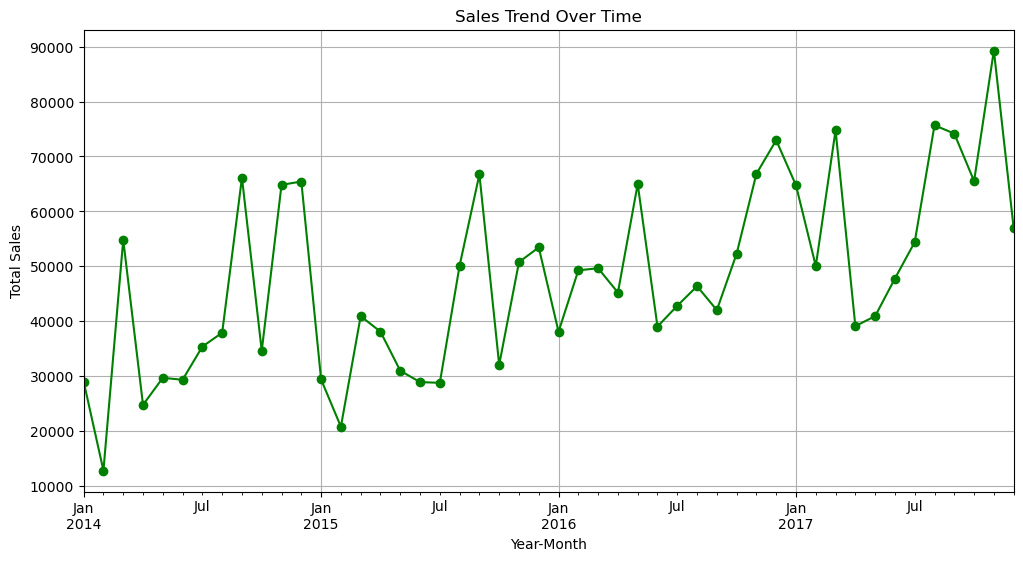

In [33]:
#setting 'Order Date' to datetime format
SuperStore['Order Date'] = pd.to_datetime(SuperStore['Order Date'])

#Extract Year and Month
SuperStore['Year-Month'] = SuperStore['Order Date'].dt.to_period('M')

#Groupby Year-Mont and sum sales
Sales_trend = SuperStore.groupby('Year-Month')['Sales'].sum()

plt.figure(figsize=(12,6))
Sales_trend.plot(kind='line', marker='o', linestyle='-', color='green')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.title('Sales Trend Over Time')
plt.grid(True)
plt.show()

- **Which category of products generates the highest revenue and profit?**

In [41]:
Category_Sales = SuperStore.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

print(f'Category of products that generate the highest revenue and profit is:\n\n  {Category_Sales}')

Category of products that generate the highest revenue and profit is:

                         Sales       Profit
Category                                 
Technology       836154.0330  145454.9481
Furniture        741999.7953   18451.2728
Office Supplies  719047.0320  122490.8008


- **Which region generates the most sales?**

In [55]:
HighestRegion_Sales = SuperStore.groupby('Region')['Sales'].sum().sort_values(ascending=False)

print(f'Region which generates the most sales is:\n \n {HighestRegion_Sales}')

Region which generates the most sales is:
 
 Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64


- **What is the impact of discounts and promotions -on sales?**

<Axes: xlabel='Discount', ylabel='Sales'>

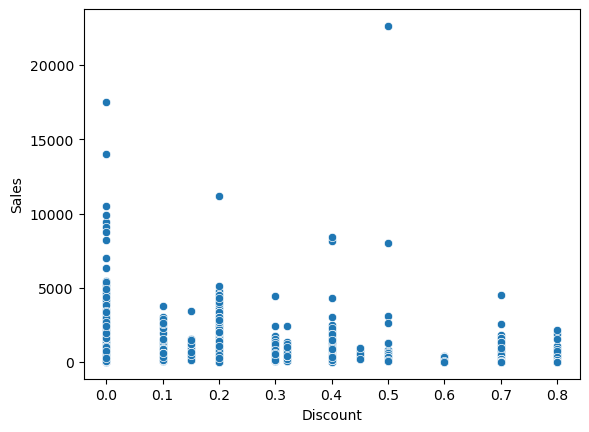

In [59]:
sns.scatterplot(data=SuperStore, x='Discount', y='Sales')

In [67]:
SuperStore['Has  Discount'] = SuperStore['Discount']> 0
discount_impact = SuperStore.groupby('Has  Discount')['Sales'].mean()
print(f'Impact of discount and promotion on sales:\n \n {discount_impact}')

Impact of discount and promotion on sales:
 
 Has  Discount
False    226.742074
True     232.735256
Name: Sales, dtype: float64


- **What is the average profit margin for each product category?**



In [72]:
SuperStore['Profit Margin'] = (SuperStore['Profit']/ SuperStore['Sales'])*100
CategoryProfit_Margin = SuperStore.groupby('Category')['Profit Margin'].mean().sort_values(ascending=False)

print(f'Average Profit Margin for each Product Category is:\n \n {CategoryProfit_Margin}')

Average Profit Margin for each Product Category is:
 
 Category
Technology         15.613805
Office Supplies    13.803029
Furniture           3.878353
Name: Profit Margin, dtype: float64


- **Which sub-category of products has the highest demand?**

In [77]:
SubCategory_Demand = SuperStore.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending=False)

print(f'Highest Sub-Category of product is:\n\n {SubCategory_Demand}')

Highest Sub-Category of product is:

 Sub-Category
Binders        5974
Paper          5178
Furnishings    3563
Phones         3289
Storage        3158
Art            3000
Accessories    2976
Chairs         2356
Appliances     1729
Labels         1400
Tables         1241
Fasteners       914
Envelopes       906
Bookcases       868
Supplies        647
Machines        440
Copiers         234
Name: Quantity, dtype: int64


- **Which Year had the most and least sales?**

In [101]:
SuperStore['Year'] =SuperStore['Order Date'].dt.year
YearlySales = SuperStore.groupby('Year')['Sales'].sum()

Most_Sales_year = YearlySales.idxmax()
Least_Sales_year= YearlySales.idxmin()

print(f'Year with the most sales:\n Year: {Most_Sales_year}\n Sales:{YearlySales.max()}\n')
print(f'Year with the least sales:\n Year: {Least_Sales_year}\n Sales:{YearlySales.min()}')

Year with the most sales:
 Year: 2017
 Sales:733215.2552

Year with the least sales:
 Year: 2015
 Sales:470532.509


- **Which month had the most and least sales?**



In [107]:
SuperStore['Month'] =SuperStore['Order Date'].dt.month
MonthlySales = SuperStore.groupby('Month')['Sales'].sum()

Most_Sales_month = MonthlySales.idxmax()
Least_Sales_month = MonthlySales.idxmin()

print(f'Month with the most sales:\n Month: {Most_Sales_month}\n Sales:{MonthlySales.max()}\n')
print(f'Month with the least sales:\n Month: {Least_Sales_month}\n Sales:{MonthlySales.min()}')

Month with the most sales:
 Month: 11
 Sales:271693.7525

Month with the least sales:
 Month: 2
 Sales:132721.3594


- **Which state had the most and least sales?**

In [113]:
StateSales = SuperStore.groupby('State')['Sales'].sum().sort_values(ascending=False)

Most_Sales_state = StateSales.idxmax()
Least_Sales_state = StateSales.idxmin()

print(f'State with the most sales:\n State: {Most_Sales_state}\n Sales:{StateSales.max()}\n')
print(f'State with the least sales:\n State: {Least_Sales_state}\n Sales:{StateSales.min()}')

State with the most sales:
 State: California
 Sales:457687.6315

State with the least sales:
 State: North Dakota
 Sales:919.91


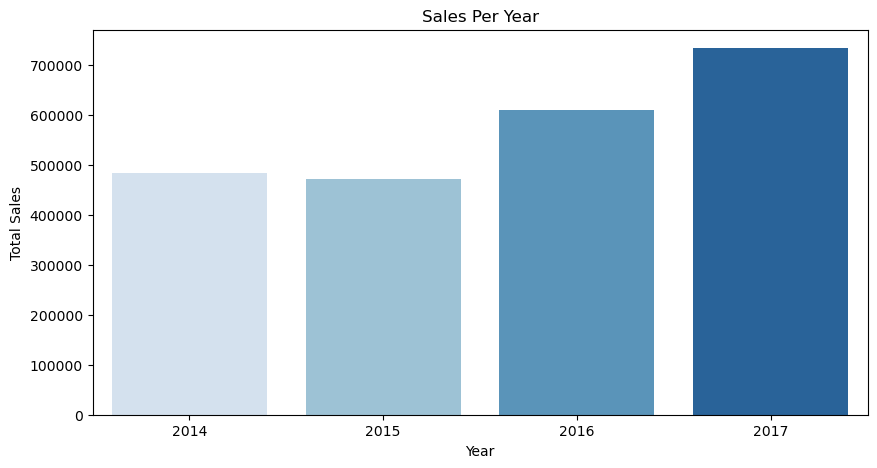

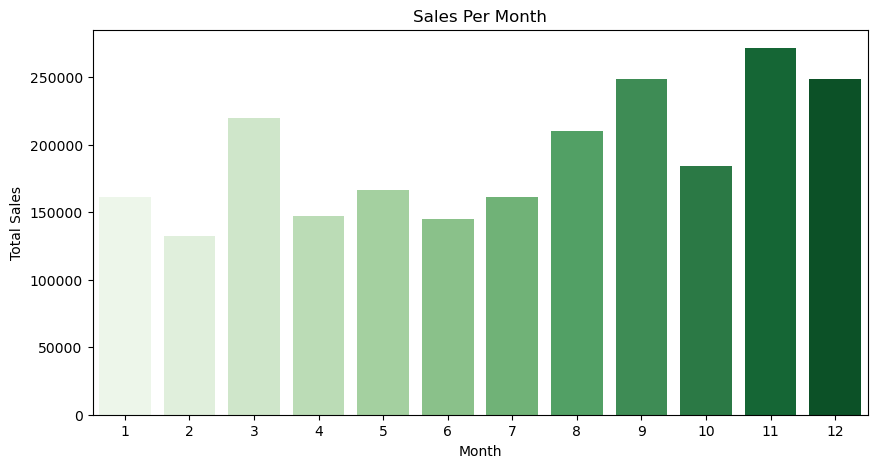

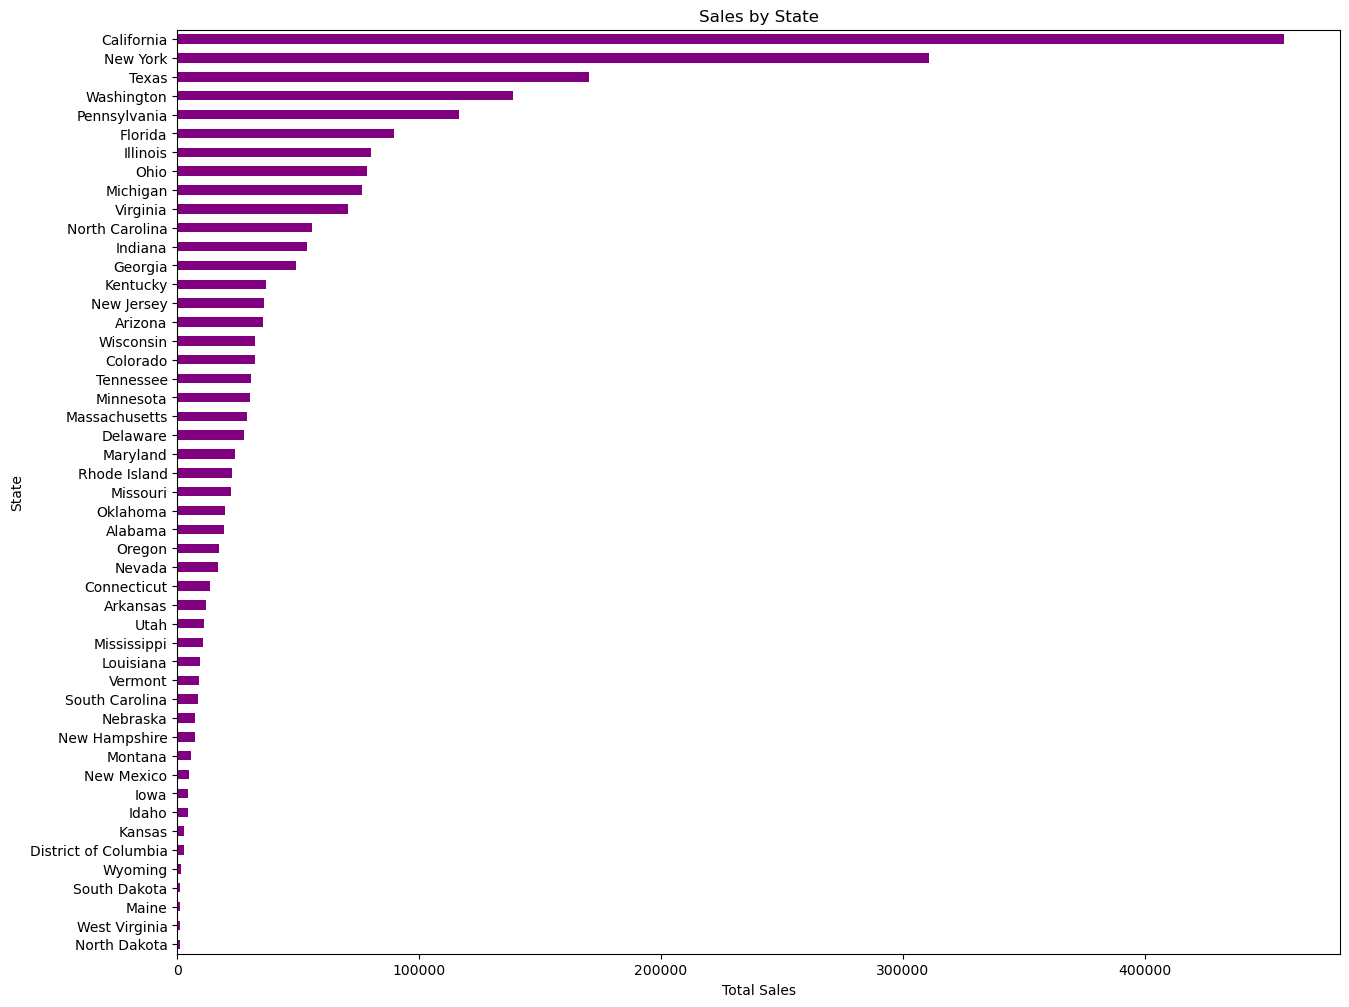

In [129]:
# Yearly Sales
plt.figure(figsize=(10, 5))
sns.barplot(x=YearlySales.index, y=YearlySales.values, palette="Blues")
plt.title("Sales Per Year")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()

# Monthly Sales
plt.figure(figsize=(10, 5))
sns.barplot(x=MonthlySales.index, y=MonthlySales.values, palette="Greens")
plt.title("Sales Per Month")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

# State Sales
plt.figure(figsize=(15,12))
StateSales.sort_values().plot(kind="barh", color="purple")
plt.title("Sales by State")
plt.xlabel("Total Sales")
plt.ylabel("State")
plt.show()

- **11. Which states had the m-ost and least profit?**

In [158]:
StateProfit = SuperStore.groupby('State')['Profit'].sum().sort_values(ascending=False)

Most_Profit_state = StateProfit.idxmax()
Least_Profit_state = StateProfit.idxmin()

print(f'State with the most profit:\n State: {Most_Profit_state}\n Sales:{StateProfit.max()}\n')
print(f'State with the least profit:\n State: {Least_Profit_state}\n Sales:{StateProfit.min()}')

State with the most profit:
 State: California
 Sales:76381.38709999999

State with the least profit:
 State: Texas
 Sales:-25729.3563


- **12. Which 3 cities had the most and least sales?**

In [165]:
CitySales = SuperStore.groupby('City')['Sales'].sum().sort_values(ascending=False)


Most_Sales_city = CitySales.idxmax()
Least_Sales_city = CitySales.idxmin()

print(f'City with the most sales:\n City: {Most_Sales_city}\n Sales:{CitySales.max()}\n')
print(f'City with the least sales:\n City: {Least_Sales_city}\n Sales:{CitySales.min()}')

City with the most sales:
 City: New York City
 Sales:256368.161

City with the least sales:
 City: Abilene
 Sales:1.392


In [175]:
Most3Cities_Sales = CitySales.head(3)
Least3cities_Sales = CitySales.tail(3)

print(f'Top 3 cities with the most sales are:\n \n {Most3Cities_Sales}\n\n')
print(f'Bottom 3 cities with the least sales are:\n \n {Least3cities_Sales}')

Top 3 cities with the most sales are:
 
 City
New York City    256368.161
Los Angeles      175851.341
Seattle          119540.742
Name: Sales, dtype: float64


Bottom 3 cities with the least sales are:
 
 City
Jupiter    2.064
Elyria     1.824
Abilene    1.392
Name: Sales, dtype: float64


- **13. Which 3 cities had most and least profit?**

In [180]:
CityProfit = SuperStore.groupby('City')['Profit'].sum().sort_values(ascending=False)

Most3Cities_Profit = CityProfit.head(3)
Least3cities_Profit = CityProfit.tail(3)

print(f'Top 3 cities with the most profit are:\n \n {Most3Cities_Profit}\n\n')
print(f'Bottom 3 cities with the least profit are:\n \n {Least3cities_Profit}')

Top 3 cities with the most profit are:
 
 City
New York City    62036.9837
Los Angeles      30440.7579
Seattle          29156.0967
Name: Profit, dtype: float64


Bottom 3 cities with the least profit are:
 
 City
San Antonio     -7299.0502
Houston        -10153.5485
Philadelphia   -13837.7674
Name: Profit, dtype: float64


- **14. Which region had the most and least sales, most and least profit?**

In [182]:
RegionSales = SuperStore.groupby('Region')['Sales'].sum().sort_values(ascending=False)

Most_Sales_Region = RegionSales.idxmax()
Least_Sales_Region = RegionSales.idxmin()

print(f'Region with the most sales:\n Region: {Most_Sales_Region}\n Sales:{RegionSales.max()}\n')
print(f'Region with the least sales:\n Region: {Least_Sales_Region}\n Sales:{RegionSales.min()}')

Region with the most sales:
 Region: West
 Sales:725457.8245

Region with the least sales:
 Region: South
 Sales:391721.905


In [185]:
RegionProfit = SuperStore.groupby('Region')['Profit'].sum().sort_values(ascending=False)

Most_Profit_Region = RegionProfit.idxmax()
Least_Profit_Region = RegionProfit.idxmin()

print(f'Region with the most profit:\n Region: {Most_Profit_Region}\n Sales:{RegionProfit.max()}\n')
print(f'Region with the least profit:\n Region: {Least_Profit_Region}\n Sales:{RegionProfit.min()}')

Region with the most profit:
 Region: West
 Sales:108418.4489

Region with the least profit:
 Region: Central
 Sales:39706.3625


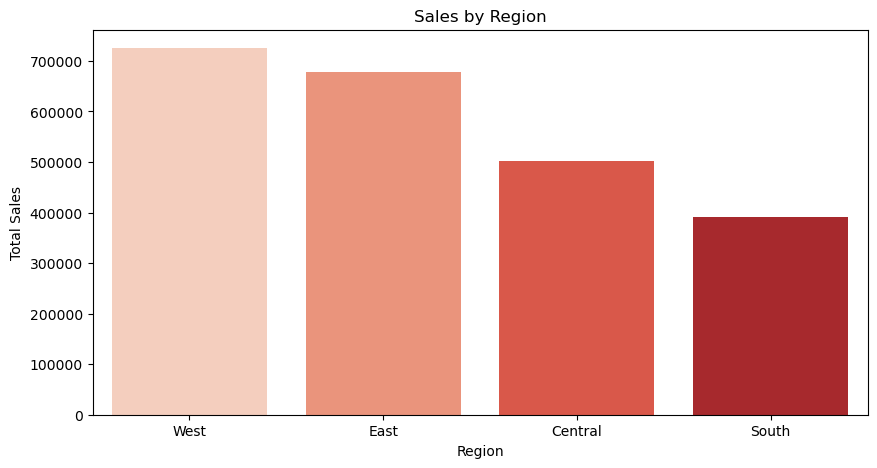

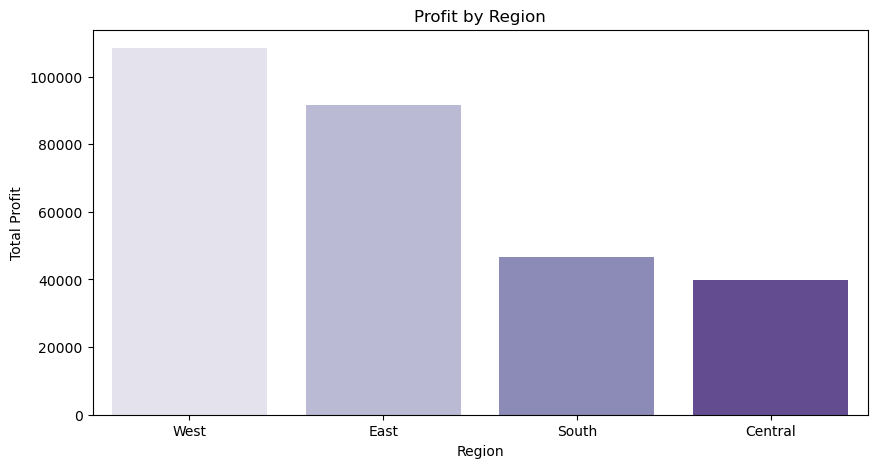

In [211]:
plt.figure(figsize=(10, 5))
sns.barplot(x=RegionSales.index, y=RegionSales.values, palette="Reds")
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=RegionProfit.index, y=RegionProfit.values, palette="Purples")
plt.title("Profit by Region")
plt.xlabel("Region")
plt.ylabel("Total Profit")
plt.show()

- **15. How many products are being sold in which shipping mode?**

In [188]:
products_by_ship_mode = SuperStore.groupby("Ship Mode")["Product Name"].nunique()
print(products_by_ship_mode)

Ship Mode
First Class       1049
Same Day           464
Second Class      1191
Standard Class    1761
Name: Product Name, dtype: int64


- **16. What is the order value for each product category by ship mode?**

In [190]:
order_value = SuperStore.groupby(["Category", "Ship Mode"])["Sales"].sum().unstack()
print(order_value)

Ship Mode        First Class   Same Day  Second Class  Standard Class
Category                                                             
Furniture        110730.5229  39148.779   156289.0244      435831.469
Office Supplies  101332.3090  29090.481   160683.0030      427941.239
Technology       139365.5910  60123.865   142221.5420      494443.035


- **17. Which product category -has the highest and least orders?**

In [239]:
category_orders = SuperStore.groupby("Category")["Order ID"].nunique().sort_values(ascending=False)

most_orders_category = category_orders.idxmax()
least_orders_category = category_orders.idxmin()

print(f"Category with most orders: {most_orders_category}\n  Orders: {category_orders.max()}\n\n")
print(f"Category with least orders: {least_orders_category} \n Orders: {category_orders.min()}")

Category with most orders: Office Supplies
  Orders: 3742


Category with least orders: Technology 
 Orders: 1544


- **18. Which sub-categor-y has the highest and least orders?**

In [241]:
sub_category_orders = SuperStore.groupby("Sub-Category")["Order ID"].nunique().sort_values(ascending=False)

most_orders_sub_category = sub_category_orders.idxmax()
least_orders_sub_category = sub_category_orders.idxmin()

print(f"Sub-Category with most orders: {most_orders_sub_category} \n Orders: {sub_category_orders.max()}\n\n")
print(f"Sub-Category with least orders: {least_orders_sub_category}\n  Orders: {sub_category_orders.min()}")

Sub-Category with most orders: Binders 
 Orders: 1316


Sub-Category with least orders: Copiers
  Orders: 68


- **19. Which sub-category has the- highest and lowest profit and sales?**

In [254]:
Sub_categorySales = SuperStore.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

Most_Sales_Subcategory = Sub_categorySales.idxmax()
Least_Sales_Subcategory = Sub_categorySales.idxmin()

print(f'Sub-Category with the most sales:\n Sub-Category: {Most_Sales_Subcategory}\n Sales:{Sub_categorySales.max()}\n')
print(f'Sub-category with the least sales:\n Sub-CAtegory: {Least_Sales_Subcategory}\n Sales:{Sub_categorySales.min()}')

Sub-Category with the most sales:
 Sub-Category: Phones
 Sales:330007.054

Sub-category with the least sales:
 Sub-CAtegory: Fasteners
 Sales:3024.28


In [267]:
Sub_categoryProfit = SuperStore.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)

Most_Profit_Subcategory = Sub_categoryProfit.idxmax()
Least_Profit_Subcategory = Sub_categoryProfit.idxmin()

print(f'Sub-Category with the most Profit:\n Sub-Category: {Most_Profit_Subcategory}\n Profit:{Sub_categoryProfit.max()}\n')
print(f'Sub-category with the least Profit:\n Sub-Category: {Least_Profit_Subcategory}\n Profit:{Sub_categoryProfit.min()}')

Sub-Category with the most Profit:
 Sub-Category: Copiers
 Profit:55617.8249

Sub-category with the least Profit:
 Sub-Category: Tables
 Profit:-17725.4811


- **20. How many customers are there in each segment?**

In [261]:
customers_per_segment = SuperStore.groupby("Segment")["Customer ID"].nunique()
print(customers_per_segment)

Segment
Consumer       409
Corporate      236
Home Office    148
Name: Customer ID, dtype: int64


- **21. Which segment had the most and least profit and sales?.**

In [277]:
Segment_Profit = SuperStore.groupby('Segment')['Profit'].sum().sort_values(ascending=False)

Most_Profit_Segment = Segment_Profit.idxmax()
Least_Profit_Segment = Segment_Profit.idxmin()

print(f'Segment with the most Profit:\n Segment: {Most_Profit_Segment}\n Profit:{Segment_Profit.max()}\n')
print(f'Segment with the least Profit:\n Segment: {Least_Profit_Segment}\n Profit:{Segment_Profit.min()}')

Segment with the most Profit:
 Segment: Consumer
 Profit:134119.2092

Segment with the least Profit:
 Segment: Home Office
 Profit:60298.6785


In [279]:
Segment_Sales = SuperStore.groupby('Segment')['Sales'].sum().sort_values(ascending=False)

Most_Sales_Segment = Segment_Sales.idxmax()
Least_Sales_Segment = Segment_Sales.idxmin()

print(f'Segment with the most Sales:\n Segment: {Most_Sales_Segment}\n Profit:{Segment_Sales.max()}\n')
print(f'Segment with the least Sales:\n Segment: {Least_Sales_Segment}\n Profit:{Segment_Sales.min()}')

Segment with the most Sales:
 Segment: Consumer
 Profit:1161401.345

Segment with the least Sales:
 Segment: Home Office
 Profit:429653.1485


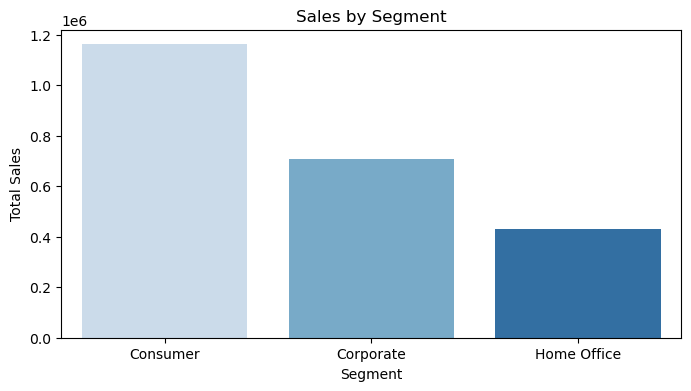

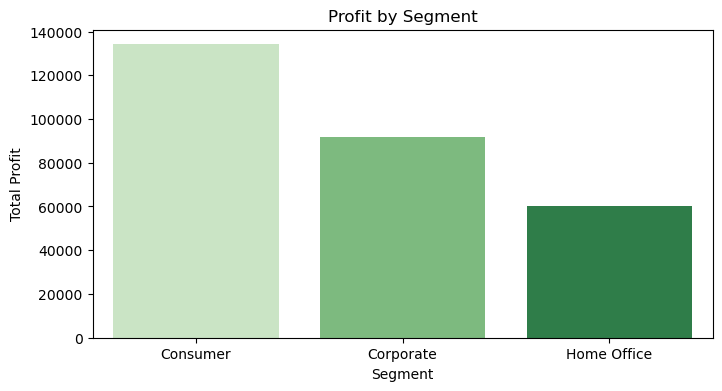

In [290]:
# Sales by Segment
plt.figure(figsize=(8, 4))
sns.barplot(x=Segment_Sales.index, y=Segment_Sales.values, palette="Blues")
plt.title("Sales by Segment")
plt.xlabel("Segment")
plt.ylabel("Total Sales")
plt.show()

# Profit by Segment
plt.figure(figsize=(8, 4))
sns.barplot(x=Segment_Profit.index, y=Segment_Profit.values, palette="Greens")
plt.title("Profit by Segment")
plt.xlabel("Segment")
plt.ylabel("Total Profit")
plt.show()